PER = 시가총액 / 당기순이익 = 주가 / 주당순이익

PER 가 높다는 건 주가가 상대적으로 고평가 되어 있음을 뜻함.

2021년 4월의 첫 번째 거래일에 PER이 낮은 30개 종목을 매수한 후 8월 마지막 거래일에 매도한 후 수익률 확인 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import platform

In [2]:

df_factor = pd.read_excel(
    "D:\download\pandas/data_kosdaq_20210401_per.xlsx",
    index_col=0,       #종목코드 옆에 0 1 2 3 4 5를 index_col=0 하면 없앰
    usecols=[0,1,6,8] #종목코드,종목명,PER,PBR   
)
df_factor.head()

# usecols=[0,1,2,3,4,5,6,7,8,9,10,11]
# 0 종목코드 1 종목명 2 종가 3 대비 4 등락률 5 EPS 6 PER 7 BPS 8 PBR 9주당배당금 10배당수익률


D:\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종목명,PER,PBR
종목코드,,,
060310,3S,-,3.38
054620,APS홀딩스,-,0.93
265520,AP시스템,42.92,3.86
211270,AP위성,300.98,2.8
035760,CJ ENM,26.55,1.05


In [3]:
#info 메서드로 데이터타입 확인 결과 -기호 때문에 per과 pbr 컬럼도 object로 표현 되었다.
df_factor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1475 entries, 060310 to 238490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목명     1475 non-null   object
 1   PER     1475 non-null   object
 2   PBR     1475 non-null   object
dtypes: object(3)
memory usage: 46.1+ KB


In [4]:
# replace 메서드를 사용해서 '-' 기호를 넘파이의 np.nan 으로 nan 타입으로 변경
# per pbr 컬럼의 데이터타입을 float로 변환 되었다.

df_factor.replace('-', np.nan, inplace=True) # PER 에 -를 replace np.nan nan 타입으로 변환 inpalce=true 하면 변경 값을 데이터프레임에 저장
df_factor.head()
df_factor.info() # 데이터 타입 확인 결과 object 였던 per과 pbr이 float 타입으로 변한 걸 확인 할 수 있다.

<class 'pandas.core.frame.DataFrame'>
Index: 1475 entries, 060310 to 238490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     1475 non-null   object 
 1   PER     857 non-null    float64
 2   PBR     1389 non-null   float64
dtypes: float64(2), object(1)
memory usage: 46.1+ KB


In [5]:
df_volume = pd.read_excel("D:\download\pandas/data_kosdaq_20210401_sise.xlsx", index_col=0, usecols=[0,9])
df_volume.head()

# index_col=0 종목코드 옆에 0 1 2 3 4 같은 인덱스를 없앰
# usecols= 0 종목코드랑 9 거래량 컬럼만 가져옴 

D:\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,거래량
종목코드,
060310,287995
054620,369245
265520,118094
211270,313536
035760,76549


In [6]:
# df_factor 데이터 프레임에 거래량 데이터 병합하기

df2 = df_factor.join(df_volume)
df2.head()

,종목명,PER,PBR,거래량
종목코드,,,,
060310,3S,NaN,3.38,287995
054620,APS홀딩스,NaN,0.93,369245
265520,AP시스템,42.92,3.86,118094
211270,AP위성,300.98,2.80,313536
035760,CJ ENM,26.55,1.05,76549


In [7]:
df2.shape #1475종목(데이터=밸류값) 4 컬럼(종목명 per pbr 거래량)

(1475, 4)

In [8]:
# 등락률 데이터를 읽어온 후  df2에 join 하기

df_change = pd.read_excel("D:\download\pandas/data_kosdaq_change_2021.xlsx", index_col=0, usecols=[0,5])
df_change.head()

df3=df2.join(df_change)
df3.head()

D:\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종목명,PER,PBR,거래량,등락률
종목코드,,,,,
060310,3S,NaN,3.38,287995,36.98
054620,APS홀딩스,NaN,0.93,369245,100.51
265520,AP시스템,42.92,3.86,118094,0.35
211270,AP위성,300.98,2.80,313536,2.93
035760,CJ ENM,26.55,1.05,76549,8.58


In [9]:
# 거래 정지 상태인 종목 솎아내기

# 거래량 0인 종목 제거

cond = df3['거래량'] != 0 #거래량이 0이 아니면 true 0이면 false 로  불린 인덱싱 거래량이 0이 아닌 것들만 cond에 바인딩
df4 = df3[cond].copy()  #df3 전체에서 cond (거래량이 0이 아닌 것들)을 카피해서 df4에 바인딩
df4



,종목명,PER,PBR,거래량,등락률
종목코드,,,,,
060310,3S,NaN,3.38,287995,36.98
054620,APS홀딩스,NaN,0.93,369245,100.51
265520,AP시스템,42.92,3.86,118094,0.35
211270,AP위성,300.98,2.80,313536,2.93
035760,CJ ENM,26.55,1.05,76549,8.58
...,...,...,...,...,...
024060,흥구석유,12.65,1.40,208970,2.91
010240,흥국,16.76,1.74,611494,-1.26
189980,흥국에프엔비,34.70,3.00,15014840,-32.25


In [10]:
# per을 기준으로 오름차순 정렬

df5 = df4.sort_values(by="PER", ascending=True) # 

#sort_values 특정 컬럼을 기준으로 정렬 df4의 per컬럼을 기준으로 오름차순 정렬 
#오름차순 ascending=True 내림차순 ascending=False  
df5.reset_index(inplace=True) #inplace=True 변경 값을 데이터프레임에 저장 

#reset_index 인덱스를 다시 처음부터 재배열 해주는 함수 전처리 과정을 거치게 되면 인덱스가 뒤죽박죽 섞이게 되는데 그 때 사용 
df5

,종목코드,종목명,PER,PBR,거래량,등락률
0,030960,양지사,1.34,0.99,50285,7.23
1,032940,원익,2.11,0.86,79905,-8.56
2,007720,대명소노시즌,2.28,0.88,728675,-9.34
3,151860,KG ETS,2.28,0.94,701304,181.89
4,005670,푸드웰,2.39,0.98,104191,15.89
...,...,...,...,...,...,...
1380,064240,홈캐스트,NaN,1.53,112157,6.79
1381,050090,휘닉스소재,NaN,3.48,9550009,-20.73
1382,090710,휴림로봇,NaN,3.05,2215108,-7.87
1383,205470,휴마시스,NaN,13.25,2360495,121.76


In [11]:
# per가 낮은 top30 종목을 선택후 등락률 컬럼의 평균 계산하기

low_per30 = df5.iloc[:30] #종목은 0번부터 시작함 29까지 나와야 30개
low_per30['등락률'].mean() #mean 평균 구하는 함수 


14.450000000000001

## 2021년 4월 1일 코스닥 지수 965.78 2021년 8월 31일 코스닥 지수 1038.33 

## 코스닥 지수의 기간 수익률 7.51% PER 전략의 등락률의 평균은 14.45%   

In [12]:
df5['group'] = pd.cut(df5.index, bins=20, labels=False)
#pd.cut 데이터 값들을 특정 구간에 따라 나눌 때 사용 동일 길이로 나누기 
#bins 구간을 몇개로 나눌 건가 20 
#labels = False 하면 라벨 쪽이 0 1 2 3으로 순차적으로 1씩 증가함
df6 = df5.groupby(by='group')[['등락률']].mean()
# 등락률의 평균(mean)을 group이라는 이름으로 groupby  
df6

,등락률
group,
0,12.979143
1,11.553971
2,15.552647
3,17.360145
4,10.876143
5,7.814783
6,8.540000
7,7.813623
8,5.913768


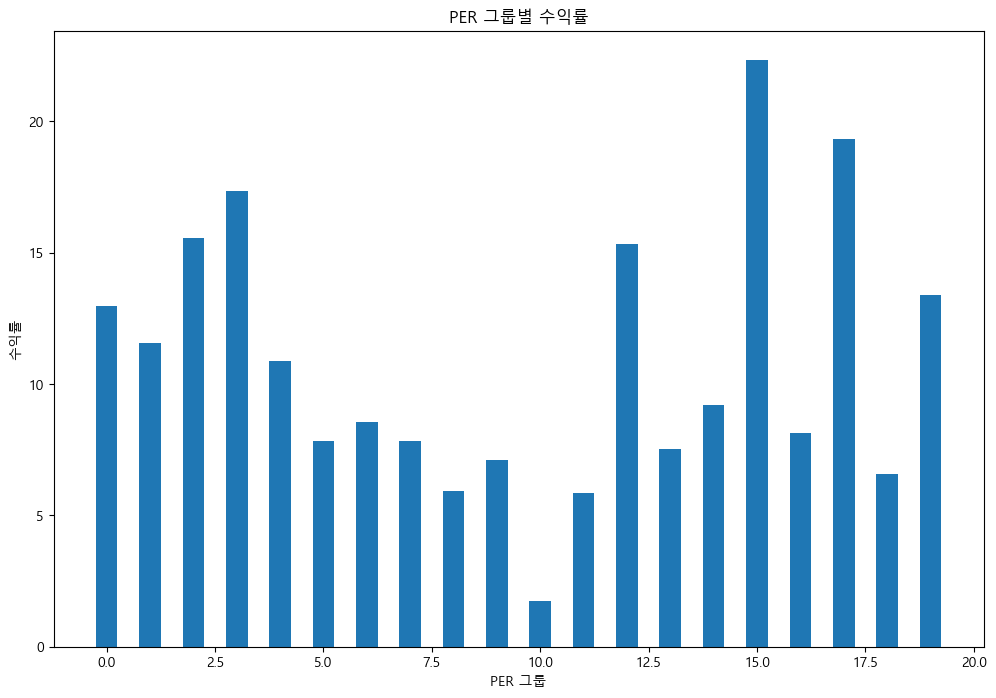

In [13]:
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.bar(df6.index, df6["등락률"], width=0.5) #df6.index랑 df6 등락률을 차트화 width 바의 굵기 
#df6.index group 컬럼 0 1 2 3 4 5 6  df6 등락률 =values 값  12.9 등의 퍼센트 값 
plt.title("PER 그룹별 수익률")
plt.xlabel("PER 그룹")
plt.ylabel("수익률")
plt.show()

## per가 낮은 그룹과 높은 그룹에서 상대적으로 높은 수익률이 나왔다.



# PBR + PER 콤보전략

투자대상 : 코스닥 전종목

매수전략 : PER 2.5~ 10인 주식 중 PBR이 낮은 30개 종목을 매수

매도전략 : 일정 기간 보유 후 매도


PBR = 시가총액 / 자본 

PBR이 1보다 낮으면 저평가 된 주식 일반적으로 저 PBR이 고 PBR 보다 수익률이 높다.

In [14]:
df4 # PER PBR 거래량 등락률 데이터 

,종목명,PER,PBR,거래량,등락률
종목코드,,,,,
060310,3S,NaN,3.38,287995,36.98
054620,APS홀딩스,NaN,0.93,369245,100.51
265520,AP시스템,42.92,3.86,118094,0.35
211270,AP위성,300.98,2.80,313536,2.93
035760,CJ ENM,26.55,1.05,76549,8.58
...,...,...,...,...,...
024060,흥구석유,12.65,1.40,208970,2.91
010240,흥국,16.76,1.74,611494,-1.26
189980,흥국에프엔비,34.70,3.00,15014840,-32.25


In [15]:
# PER이 2.5 ~ 10 인 종목 필터링
cond = (df4['PER'] >= 2.5) & (df4['PER'] <= 10) # per가 2.5보다 크거나 같고 10보다 작거나 같아야함 and 연산자 두개 다 만족 해야함
# 저 조건을 만족하면 true 이고 true인 데이터를 cond 에 바인딩
df5 =df4[cond].copy() #df4에 conda만 카피해서 df5에 바인딩
df5 #2.5<=per<=10에 조건을 만족하는 종목 104개

,종목명,PER,PBR,거래량,등락률
종목코드,,,,,
023460,CNH,6.58,0.99,138189,35.30
028150,GS홈쇼핑,8.28,0.87,7971,NaN
021320,KCC건설,6.96,0.52,51828,26.36
036670,KCI,8.99,1.65,17555,-3.35
024940,PN풍년,9.10,1.37,528639,29.52
...,...,...,...,...,...
054040,한국컴퓨터,9.46,0.80,4380527,-3.62
054920,한컴위드,4.72,2.04,673200,4.12
039010,현대통신,9.09,1.19,103289,-16.09


In [16]:
# 2.5<=per<=10로 필터링 된 종목중에 PBR을 기준으로 오름차순 정렬 후 30개 종목 선정

df6 = df5.sort_values(by='PBR')[:30] #pbr 컬럼을 오름차순으로 정렬
df6.describe() #describe 함수는 선정된 종목들의 통계 정보를 출력


#등락률의 mean 평균은 13.26% 수익의 max 최대값은 99.22% 최대 손실 min = 38.19%

,PER,PBR,거래량,등락률
count,30.000000,30.000000,3.000000e+01,30.000000
mean,6.250000,0.558667,4.345707e+06,13.265667
std,1.925885,0.130377,1.984129e+07,26.490045
min,2.890000,0.280000,7.130000e+03,-38.190000
25%,5.082500,0.485000,3.468775e+04,-2.790000
50%,6.100000,0.580000,7.865950e+04,11.555000
75%,7.977500,0.670000,2.856495e+05,26.232500
max,9.100000,0.730000,1.083873e+08,99.220000


## 5개월간의 등락률 평균(mean) 13.26% 수익의 최대값(max) 99.22% 최대 손실(min) -38.19%

# <hr/>
# 시가 총액별 콤보 전략

In [17]:
from pykrx import stock
import pandas as pd
df1 = stock.get_market_cap("20100104") #2010년 1월 4일의 시가총액 데이터 가져오기 
#df1 # 확인
df1



,종가,시가총액,거래량,거래대금,상장주식수
티커,,,,,
005930,809000,119165163633000,239271,192566991282,147299337
005490,612000,53358343020000,133963,81892175000,87186835
005380,119000,26212901001000,1606672,190847186500,220276479
105560,59400,22949290564200,1201665,71147524000,386351693
015760,34250,21973694136000,1924201,65724306900,641567712
...,...,...,...,...,...
017555,174500,177990000,6,1075500,1020
033855,12850,145873200,0,0,11352
009815,641000,110893000,0,0,173


In [18]:
df1 = df1[["종가","시가총액"]] #종가랑 시가총액 데이터만 따로 떼서 df1에 다시 바인딩
df1 # 컬럼 종가 시가총액만 있는 거 확인

,종가,시가총액
티커,,
005930,809000,119165163633000
005490,612000,53358343020000
005380,119000,26212901001000
105560,59400,22949290564200
015760,34250,21973694136000
...,...,...
017555,174500,177990000
033855,12850,145873200
009815,641000,110893000


In [19]:
df1.columns = ["시가","시가총액"] # 컬럼 종가 시가총액을 시가 시가총액으로 변경
df1 # 컬럼 시가 시가총액 있는 거 확인

,시가,시가총액
티커,,
005930,809000,119165163633000
005490,612000,53358343020000
005380,119000,26212901001000
105560,59400,22949290564200
015760,34250,21973694136000
...,...,...
017555,174500,177990000
033855,12850,145873200
009815,641000,110893000


In [20]:
df1 = df1.sort_values('시가총액') #df1에 있는 시가총액 컬럼을 오름차순으로 sort value해서 df1에 다시 바인딩

In [21]:
df1['group'] = pd.cut(df1.reset_index().index, bins=3, labels=['소형주','중형주','대형주'])
df1
# 컬럼명이 그룹인 새 컬럼을 만든다.
# 그 안에 df1 데이터의 인덱스 데이터를 bins=3 3등분 하고 소형주,중형주,대형주로 라벨링 한다.

,시가,시가총액,group
티커,,,
001385,5466000,60126000,소형주
020075,3750,75000000,소형주
009815,641000,110893000,소형주
033855,12850,145873200,소형주
017555,174500,177990000,소형주
...,...,...,...
015760,34250,21973694136000,대형주
105560,59400,22949290564200,대형주
005380,119000,26212901001000,대형주


In [22]:
df2 = stock.get_market_fundamental ("20100104") 
#20100104에 펀더멘털 데이터를 가져온다
df2

,BPS,PER,PBR,EPS,DIV,DPS
티커,,,,,,
004560,11755,0.00,0.76,0,0.00,0
004565,0,0.00,0.00,0,0.00,0
001460,288027,16.15,0.43,7741,0.60,750
001465,0,0.00,0.00,0,1.44,800
084680,656,0.00,1.69,0,0.00,0
...,...,...,...,...,...,...
069260,10918,15.18,2.72,1953,3.37,1000
000540,2729,0.00,2.51,0,0.00,0
000547,0,0.00,0.00,0,0.00,0


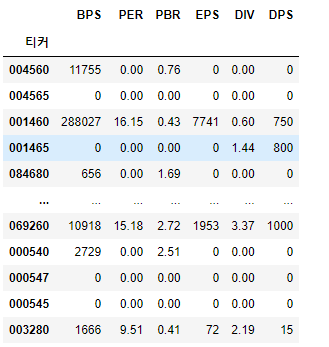

In [23]:
df2 = df2[['PER', 'PBR']] #df2에 per pbr 컬럼만 가져와서 df2에 바인딩 한다
df2.head()

,PER,PBR
티커,,
004560,0.00,0.76
004565,0.00,0.00
001460,16.15,0.43
001465,0.00,0.00
084680,0.00,1.69


In [24]:
df3 = stock.get_market_ohlcv("20101230") #20101230의 OHLCV 데이터 가져오기
df3

,시가,고가,저가,종가,거래량,거래대금,등락률
티커,,,,,,,
004560,11100,11350,11000,11250,62628,700701500,1.81
004565,12250,12500,12100,12450,620,7638000,1.63
001460,163000,163000,161000,161000,62,10092500,-1.23
001465,74400,74400,74400,74400,2,148800,0.00
001040,79000,80600,78700,78900,198171,15731238700,-0.50
...,...,...,...,...,...,...,...
069260,20100,20200,19600,19600,338324,6682131600,-2.49
000540,5800,6150,5800,6100,311020,1886343800,3.92
000547,5840,6000,5800,6000,1300,7718000,3.45


In [25]:
df3 = df3[['종가']] #종가 데이터만 df3에 바인딩
df3.head()

,종가
티커,
004560,11250
004565,12450
001460,161000
001465,74400
001040,78900


In [26]:
df1

,시가,시가총액,group
티커,,,
001385,5466000,60126000,소형주
020075,3750,75000000,소형주
009815,641000,110893000,소형주
033855,12850,145873200,소형주
017555,174500,177990000,소형주
...,...,...,...
015760,34250,21973694136000,대형주
105560,59400,22949290564200,대형주
005380,119000,26212901001000,대형주


In [27]:
df2

,PER,PBR
티커,,
004560,0.00,0.76
004565,0.00,0.00
001460,16.15,0.43
001465,0.00,0.00
084680,0.00,1.69
...,...,...
069260,15.18,2.72
000540,0.00,2.51
000547,0.00,0.00


In [28]:
# 일반 데이터 열이 아닌 인덱스를 기준열로 사용하려면 left_index 또는 right_index 인수를 True 로 설정한다.
#  각 데이터프레임의 인덱스를 기준으로 데이터를 merge해야 되기 때문에 left_index와 right_index 파라미터를 True로 설정

t0 = pd.merge(left=df1, right=df2, left_index=True, right_index=True)
#인덱스를 기준으로 시가 시가총액 group 데이터인 df1 왼쪽으로 
# per pbr 데이터인 df2를 오른쪽으로
t0

,시가,시가총액,group,PER,PBR
티커,,,,,
001385,5466000,60126000,소형주,0.00,0.00
009815,641000,110893000,소형주,0.00,0.00
017555,174500,177990000,소형주,0.00,0.00
012405,7470,179280000,소형주,0.00,0.00
018415,170000,192780000,소형주,0.00,0.00
...,...,...,...,...,...
015760,34250,21973694136000,대형주,0.00,0.51
105560,59400,22949290564200,대형주,0.00,0.00
005380,119000,26212901001000,대형주,22.35,1.57


In [29]:
df3

,종가
티커,
004560,11250
004565,12450
001460,161000
001465,74400
001040,78900
...,...
069260,19600
000540,6100
000547,6000


In [30]:
df = pd.merge(left=df3, right=t0, left_index=True, right_index=True)
#종가 데이터인 df3을 왼쪽으로 df1 df2를 합친 데이터인 t0을 오른쪽으로 
df



,종가,시가,시가총액,group,PER,PBR
티커,,,,,,
004560,11250,8910,134352206010,대형주,0.00,0.76
004565,12450,8370,919461240,소형주,0.00,0.00
001460,161000,125000,78076875000,중형주,16.15,0.43
001465,74400,55400,11932329000,소형주,0.00,0.00
001040,78900,62200,1767577581200,대형주,5.46,0.78
...,...,...,...,...,...,...
069260,19600,29650,631276133800,대형주,15.18,2.72
000540,6100,6850,351008604200,대형주,0.00,2.51
000547,6000,5090,781824000,소형주,0.00,0.00


In [31]:
df = df.query('PBR != 0') #데이터 중에 PBR이 0이 아닌 것만 df에 바인딩 함
# query 함수 조건에 부합하는 데이터를 추출할 때 씀 PBR이 0인 이상한 종목을 제거하고 데이터프레임을 df에 바인딩 
df

,종가,시가,시가총액,group,PER,PBR
티커,,,,,,
004560,11250,8910,134352206010,대형주,0.00,0.76
001460,161000,125000,78076875000,중형주,16.15,0.43
001040,78900,62200,1767577581200,대형주,5.46,0.78
079160,28000,21100,435028363800,대형주,21.71,6.18
011150,2365,1065,38266273245,중형주,71.00,1.81
...,...,...,...,...,...,...
005870,5970,7170,72962027550,중형주,0.00,1.21
005010,17450,15900,110006010300,대형주,1.48,0.34
069260,19600,29650,631276133800,대형주,15.18,2.72


In [32]:
df['수익률'] = df['종가'] / df['시가'] 
#수익률이라는 컬럼 새로 만듬 종가-시가 
df

# 각 종목에 투자했을 때의 수익률을 미리 계산합니다.

C:\Users\wlsgu\AppData\Local\Temp\ipykernel_20020\1920212517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['수익률'] = df['종가'] / df['시가']


,종가,시가,시가총액,group,PER,PBR,수익률
티커,,,,,,,
004560,11250,8910,134352206010,대형주,0.00,0.76,1.262626
001460,161000,125000,78076875000,중형주,16.15,0.43,1.288000
001040,78900,62200,1767577581200,대형주,5.46,0.78,1.268489
079160,28000,21100,435028363800,대형주,21.71,6.18,1.327014
011150,2365,1065,38266273245,중형주,71.00,1.81,2.220657
...,...,...,...,...,...,...,...
005870,5970,7170,72962027550,중형주,0.00,1.21,0.832636
005010,17450,15900,110006010300,대형주,1.48,0.34,1.097484
069260,19600,29650,631276133800,대형주,15.18,2.72,0.661046


In [33]:
cond = (df['PER'] >= 2.5) & (df['PER'] <= 10) # 불 인덱싱 
# PER이 2.5보다 크거나 같고 10보다 작거나 같다 둘다 만족 시켜야 함 & and 연산자  
df[cond] # 2.5 <= PER <= 10인 조건의 데이터프레임


# PBR을 기준으로 데이터를 정렬합니다.

,종가,시가,시가총액,group,PER,PBR,수익률
티커,,,,,,,
001040,78900,62200,1767577581200,대형주,5.46,0.78,1.268489
000590,64200,68000,40800000000,중형주,3.35,0.52,0.944118
069730,3915,4655,67032000000,중형주,3.68,1.23,0.841031
017940,54700,65800,451388000000,대형주,7.27,0.71,0.831307
007700,5560,3090,47586000000,중형주,4.72,0.44,1.799353
...,...,...,...,...,...,...,...
006060,8940,9570,52941240000,중형주,4.10,0.43,0.934169
010660,21000,13150,28930000000,소형주,4.17,0.32,1.596958
000850,39500,34000,74800000000,중형주,4.62,0.70,1.161765


In [34]:
df.group

티커
004560    대형주
001460    중형주
001040    대형주
079160    대형주
011150    중형주
         ... 
005870    중형주
005010    대형주
069260    대형주
000540    대형주
003280    중형주
Name: group, Length: 669, dtype: category
Categories (3, object): ['소형주' < '중형주' < '대형주']

In [35]:
# sort_values 메서드는 데이터 값을 기준으로 정렬 (숫자가 작은 순서대로)
# groupby 같은 값들을 그룹화 
# 

top30 = df[cond].sort_values('PBR').groupby('group').head(30)
top30.head()
# top30이라는 데이터프레임 안에 # 2.5 <= PER <= 10인 조건의 데이터프레임을 PBR이 낮은 기준으로 정렬 하고 
# group 컬럼의 데이터들을 소형주/중형주/대형주 별로 그룹화 
# PBR을 sort 했기 때문에 head(30) 하면 위부터 PBR이 낮은 순대로 30개 까지 선택 됨 



# groupby 메서드로 소형주/중형주/대형주 별로 데이터를 그룹화하고 각 그룹별 30개의 종목을 선택합니다. 
# 데이터가 정렬돼 있기 때문에 그룹별로 낮은 PBR 종목 30개가 선택됩니다.

,종가,시가,시가총액,group,PER,PBR,수익률
티커,,,,,,,
015110,2690,5140,33871299580,중형주,3.04,0.16,0.523346
013700,5800,6950,31380834600,중형주,8.40,0.17,0.834532
014350,4000,4600,27600000000,소형주,4.68,0.17,0.869565
004270,8200,8800,31866700800,중형주,6.90,0.18,0.931818
008600,2950,2810,35207130680,중형주,6.40,0.20,1.049822


In [37]:
how = {
    '수익률' : np.mean
}
yoy = top30.groupby('group').agg(how) 
#agg 여러개의 함수를 여러개에 적용 시키고 싶을 때 사용하는 함수 
# top30의 group 열을 그룹바이로 그룹바이 하고 수익률 열을 np.mean 평균을 낸 걸 적용해서 yoy에 바인딩
yoy.columns = ['2010']
# yoy 컬럼 이름을 2010
yoy

#소형주 29.1% 중형주 11.5% 대형주 0.4% 수익 

,2010
group,
소형주,1.291967
중형주,1.115437
대형주,1.004330


In [43]:
#10년 투자 수익률을 계산하기 위해 지금까지 작성한 전체 코드를 함수로 정리합니다. 
# low_per_pbr 함수는 문자열로 된 연도 정보를 입력받아 수익률을 데이터프레임으로 반환합니다.

def low_per_pbr(year): #년도를 입력 
    df1 = stock.get_market_cap(f"{year}0101") #마켓에서 입력한 년도의 데이터를 df1에 바인딩 
    df1 = df1[["종가", "시가총액"]] #df1에 종가 시가총액 컬럼 추가 
    df1.columns = ["시가", "시가총액"] # 컬럼명을 시가 시가총액으로 변경
    df1 = df1.sort_values('시가총액') # 시가총액을 sort
    df1['group'] = pd.cut(df1.reset_index().index, bins=3, labels=['소형주', '중형주', '대형주'])
    # group 컬럼을 만들고 그 안에 df1에 인덱스를 bins 3등분 하고 세등분한 이름을 소형주 중형주 대형주로 한다
    df2 = stock.get_market_fundamental(f"{year}0101") # 입력한 년도의 펀더멘탈 데이터를 df2에 바인딩 
    df2 = df2[['PER', 'PBR']] #df2에 per pbr이라는 컬럼 추가 

    df3 = stock.get_market_ohlcv(f"{year}1230") #입력한 년도의 ohlcv 데이터를 df3에 바인딩  
    df3 = df3[['종가']] # 종가 컬럼 추가 

    t0 = pd.merge(left=df1, right=df2, left_index=True, right_index=True)
    # 인덱스를 기준으로 왼쪽에 df1 오른쪽에 df2 데이터를 merge 해서 t0에 바인딩 
    df = pd.merge(left=df3, right=t0, left_index=True, right_index=True)
    # 인덱스를 기준으로 왼쪽에 df3 데이터 오른쪽에 t0 데이터를 merge 해서 df에 바인딩
    df = df.query('PBR != 0').copy() #query문으로 pbr이 0이 아닌 값만 추출해서 df에 바인딩
    df['수익률'] = df['종가'] / df['시가'] #df에 수익률 컬럼 만들고 종가 / 시가 연산한 데이터를 수익률 컬럼에 바인딩
    cond = (df['PER'] >= 2.5) & (df['PER'] <= 10) # 상기의 목적 2.5<=PER<=10인 데이터를 cond에 바인딩
    top30 = df[cond].sort_values('PBR').groupby('group').head(30) 
    #cond 데이터 pbr 기준으로 오름차순 정렬 
    #groupby로 group 컬럼 데이터 소형주/중형주/대형주 별로 그룹화 
    #상위 30개의 데이터를 top30에 바인딩
    # sort 했기 때문에 결과적으로 그룹별로 낮은 pbr 종목 30개가 선택 된다
    how = {
        '수익률' : np.mean
    }
    # 수익률 컬럼의 평균 값을 how에 바인딩
    yoy = top30.groupby('group').agg(how) 
    #  소형주/중형주/대형주 별로 수익률 평균 구해서 yoy에 바인딩
    yoy.columns = [year] #yoy에 입력한 년도의 컬럼을 추가
    return yoy #리턴 


